# Traffic Prediction (Random Forest)

About Dataset

This dataset contains hourly traffic counts from four road junctions (~48 000 rows).
It is used to analyze traffic patterns and predict future vehicle volume.

Columns:
• DateTime (timestamp)  
• Junction (1-4)  
• Vehicles (hourly count)  
• ID (unique record)

Note: Each junction has different time periods of data.

**Load and inspect dataset**

In [1]:
# Import libraries
# data manipulation
import pandas as pd
# numerical calculations
import numpy as np
# data visualization
import matplotlib.pyplot as plt
# display plots in notebook
%matplotlib inline

In [2]:
# Load the traffic dataset from Kaggle
df = pd.read_csv('/kaggle/input/traffic-prediction-dataset/traffic.csv')

# Display first few rows
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


**Descriptive Analysis**

In [3]:
# Check dataset size (rows, columns)
df.shape

(48120, 4)

In [4]:
# Dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# Summary statistics for numeric columns
df.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [6]:
# Check missing values count per column
df.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

The traffic dataset contains no null values.

In [7]:
# Check number of junctions
df['Junction'].nunique()

4

Convert the date column to the date datatype using the pd.to_datatime(column)

In [8]:
# Convert dateTime from string (object) to datetime format (datetime64[ns] type)
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Sort by time
df = df.sort_values('DateTime')

# Display first few rows
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
14592,2015-11-01 00:00:00,2,6,20151101002
29184,2015-11-01 00:00:00,3,9,20151101003
29185,2015-11-01 01:00:00,3,7,20151101013
1,2015-11-01 01:00:00,1,13,20151101011


**Exploratory Data Analysis (EDA)**

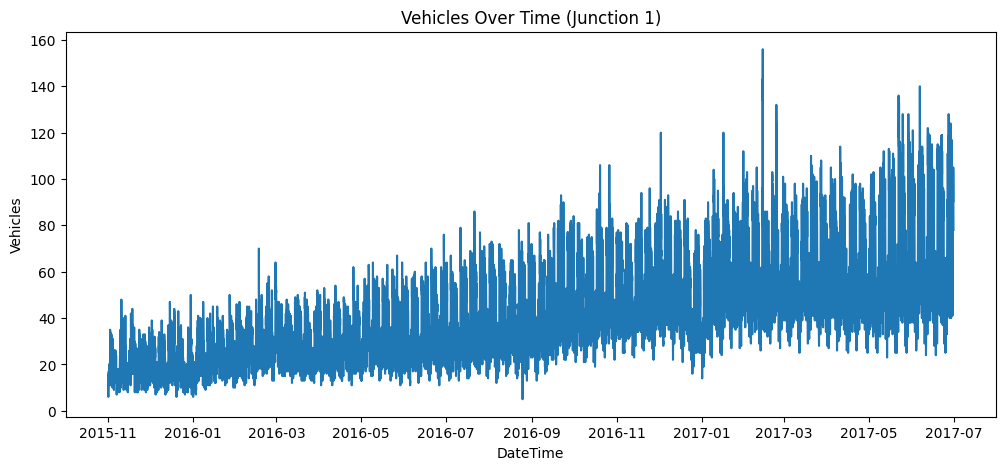

In [9]:
# Vehicles vs Time
# Traffic volume over time at junction 1

junction = 1  # change to 1, 2, 3, 4

df_j = df[df['Junction'] == junction]

plt.figure(figsize=(12, 5))
plt.plot(df_j['DateTime'], df_j['Vehicles'])
plt.xlabel("DateTime")
plt.ylabel("Vehicles")
plt.title(f"Vehicles Over Time (Junction {junction})")
plt.show()

- The chart shows a clear upward trend. From 2015 to 2017, the number of cars at Junction 1 steadily increased.
- At the beginning (late 2015), the busiest hour had about 40 vehicles. By mid-2017, the busiest hour rose to over 150 vehicles.

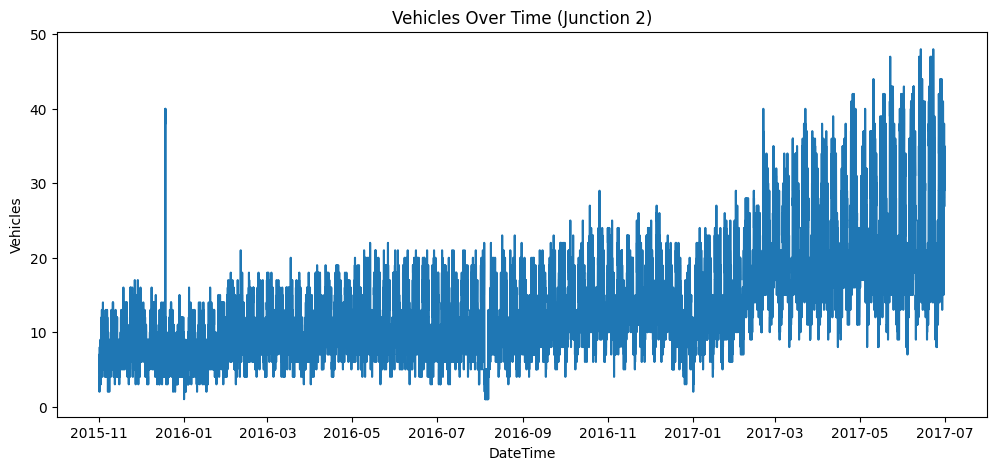

In [10]:
# Vehicles vs Time
# Traffic volume over time at junction 2

junction = 2  # change to 1, 2, 3, 4

df_j = df[df['Junction'] == junction]

plt.figure(figsize=(12, 5))
plt.plot(df_j['DateTime'], df_j['Vehicles'])
plt.xlabel("DateTime")
plt.ylabel("Vehicles")
plt.title(f"Vehicles Over Time (Junction {junction})")
plt.show()

- Like Junction 1, traffic at Junction 2 also shows a steady upward trend from 2015 to 2017.
- At the beginning (late 2015), the busiest hour had about 14 vehicles. By mid-2017, it increased to over 44 vehicles.

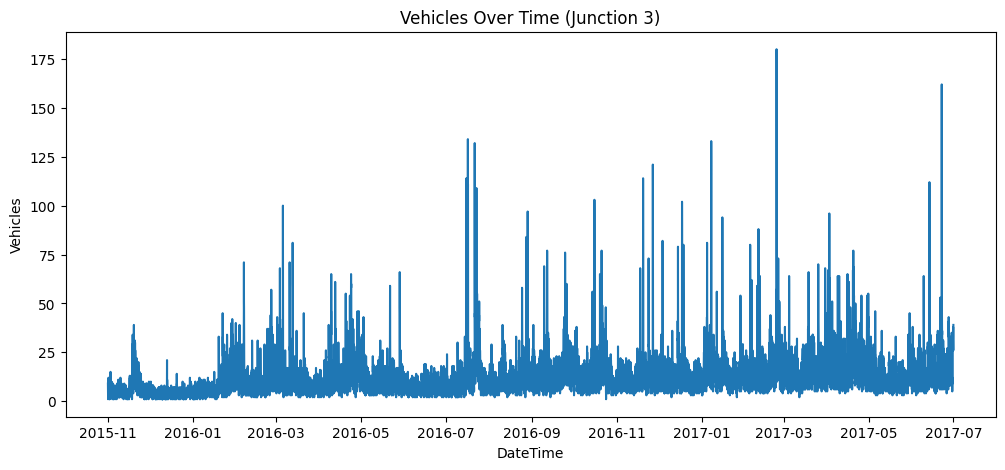

In [11]:
# Vehicles vs Time
# Traffic volume over time at junction 3

junction = 3  # change to 2, 3, 4

df_j = df[df['Junction'] == junction]

plt.figure(figsize=(12, 5))
plt.plot(df_j['DateTime'], df_j['Vehicles'])
plt.xlabel("DateTime")
plt.ylabel("Vehicles")
plt.title(f"Vehicles Over Time (Junction {junction})")
plt.show()

- Like Junctions 1 and 2, traffic at Junction 3 shows a clear upward trend from 2015 to 2017.
- At the start (late 2015), the busiest hour had about 10 vehicles. By mid-2017, it rose sharply to over 160 vehicles, even reaching 180 at times.

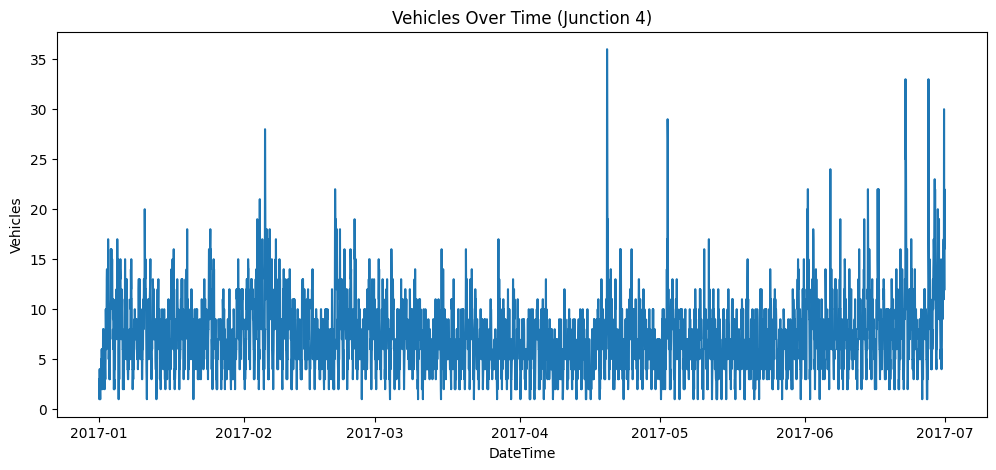

In [12]:
# Vehicles vs Time
# Traffic volume over time at junction 4

junction = 4  # change to 1, 2, 3, 4

df_j = df[df['Junction'] == junction]

plt.figure(figsize=(12, 5))
plt.plot(df_j['DateTime'], df_j['Vehicles'])
plt.xlabel("DateTime")
plt.ylabel("Vehicles")
plt.title(f"Vehicles Over Time (Junction {junction})")
plt.show()

- Like the other junctions, traffic at Junction 4 shows an upward trend. Even though the data only starts in early 2017, the total traffic steadily increased over the six months.
- In January 2017, the busiest hour had about 20 vehicles. By June 2017, it rose to 36 vehicles.

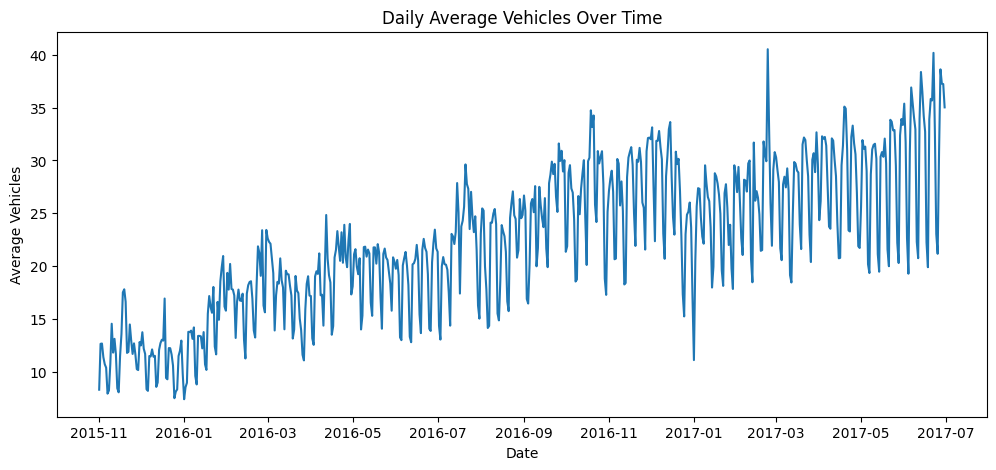

In [13]:
# Daily average vehicles vs Date
# Daily average traffic volume over time

df_daily = df.groupby(pd.Grouper(key='DateTime', freq='D'))['Vehicles'].mean().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(df_daily['DateTime'], df_daily['Vehicles'])
plt.xlabel("Date")
plt.ylabel("Average Vehicles")
plt.title("Daily Average Vehicles Over Time")
plt.show()

- At the start (late 2015), the average daily traffic was about 12 vehicles per hour.
- By mid-2017, it increased to over 31 vehicles per hour.
- The chart shows that this growth is steady, not just a one-time spike, which suggests the area is becoming busier overall.

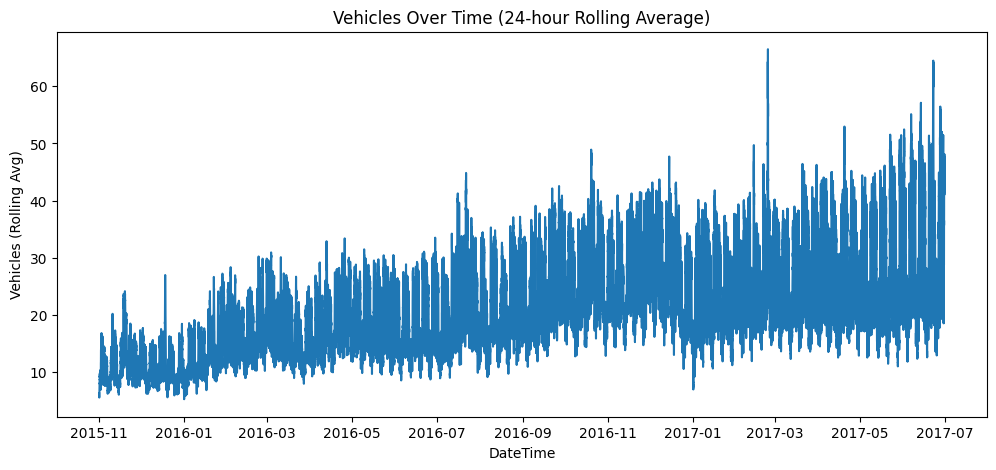

In [14]:
# Rolling average vehicles vs Time
# Traffic volume trend using 24-hour rolling average

df['Vehicles_rolling'] = df['Vehicles'].rolling(window=24).mean()

plt.figure(figsize=(12, 5))
plt.plot(df['DateTime'], df['Vehicles_rolling'])
plt.xlabel("DateTime")
plt.ylabel("Vehicles (Rolling Avg)")
plt.title("Vehicles Over Time (24-hour Rolling Average)")
plt.show()

- Traffic is not just spiking occasionally; the overall number of cars on the road is steadily increasing.
- In late 2015, the rolling average was about 10–15 vehicles. By mid-2017, it rose to around 35–40 vehicles.
- The rolling average smooths out daily ups and downs, showing the long-term growth of the traffic network.

**ML**

From the EDA, traffic shows clear trends by hour and junction. Random Forest Regressor is used to learn from these patterns and predict future traffic.

In [15]:
# Import ml libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [16]:
# Feature engineering: convert date time to numbers for ml 
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek

# Display results
print(df[['DateTime', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].head())

                 DateTime  Year  Month  Day  Hour  DayOfWeek
0     2015-11-01 00:00:00  2015     11    1     0          6
14592 2015-11-01 00:00:00  2015     11    1     0          6
29184 2015-11-01 00:00:00  2015     11    1     0          6
29185 2015-11-01 01:00:00  2015     11    1     1          6
1     2015-11-01 01:00:00  2015     11    1     1          6


In [17]:
# Identify features X (input) & target y (output)
# X = input features the model will learn from (Junction, Year, Month, Day, Hour, Day of the Week)
# y = target value to predict (Vehicles)

X = df[['Junction', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']]
y = df['Vehicles']

In [18]:
# Split into train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a model (random forest)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

In [ ]:
# Predict model
predictions = model.predict(X_test)

In [ ]:
# Compare actual with predicted
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results.head())

In [ ]:
# Measure model accuracy
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print("R2 Score:", r2)
print("MAE:", mae)

In [ ]:
# Find model accuracy percentage
r2_percent = r2 * 100

print("--Model Performance--")
print(f"Accuracy (R2): {r2_percent:.2f}%")
print(f"Error (MAE): {mae:.2f}")

**Reference**

- Kaggle dataset: [Traffic Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset)